In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# California Housing Prices
dataset = fetch_california_housing(as_frame = True)
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
!pip install pdpbox

In [8]:
from sklearn import svm
clf = svm.SVR()
clf.fit(X_train,y_train)

SVR()

In [9]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [11]:
from pdpbox import pdp
pdp_A = pdp.pdp_isolate(model=clf,                  
                          dataset=X_train,                              
                          model_features=X_train.columns,
                          feature='MedInc')

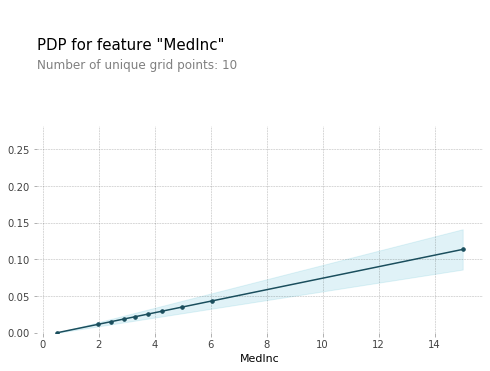

In [12]:
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'font_family': 'Arial',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_A,
                         feature_name='MedInc', 
                         center=True, 
                         x_quantile=False, 
                         ncols=2,
                         plot_lines=False, 
                         frac_to_plot=100,
                         plot_params=plot_params, 
                         figsize=(8, 6))

In [26]:
df = pd.read_csv('cardio_train.csv', delimiter=';', nrows=10000)

In [29]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


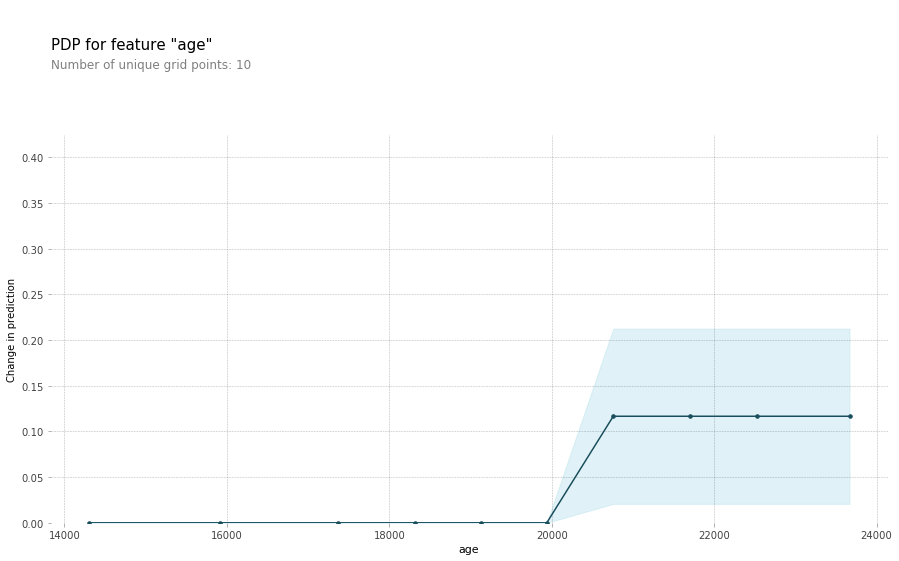

In [28]:
import matplotlib.pyplot as plt
import pdpbox.pdp as pdp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

# Split the data into train and test sets
features = df.drop('cardio', axis=1)
target = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(features, target)

# Fit a decision tree
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

# Create the partial dependency plot
graph = tree.export_graphviz(clf, feature_names=features.columns)
pdp_age = pdp.pdp_isolate(clf, X_test, features.columns, feature='age')
pdp.pdp_plot(pdp_age, 'age')
plt.ylabel("Change in prediction")
plt.show()